In [1]:
from PIL import Image
from skimage.io import imread,imshow,show
import matplotlib.pylab as pylab
import numpy as np
from skimage import img_as_ubyte

C:\Users\Anuj\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


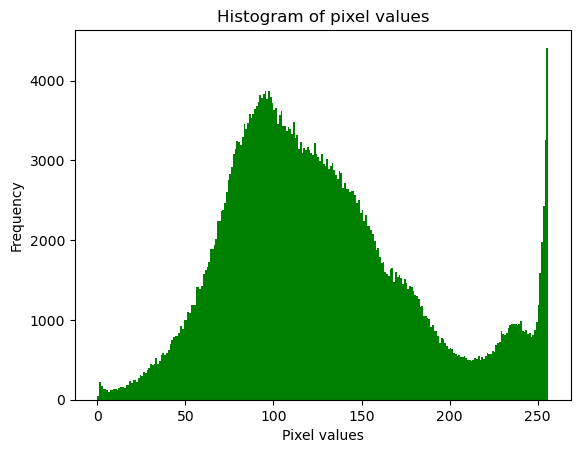

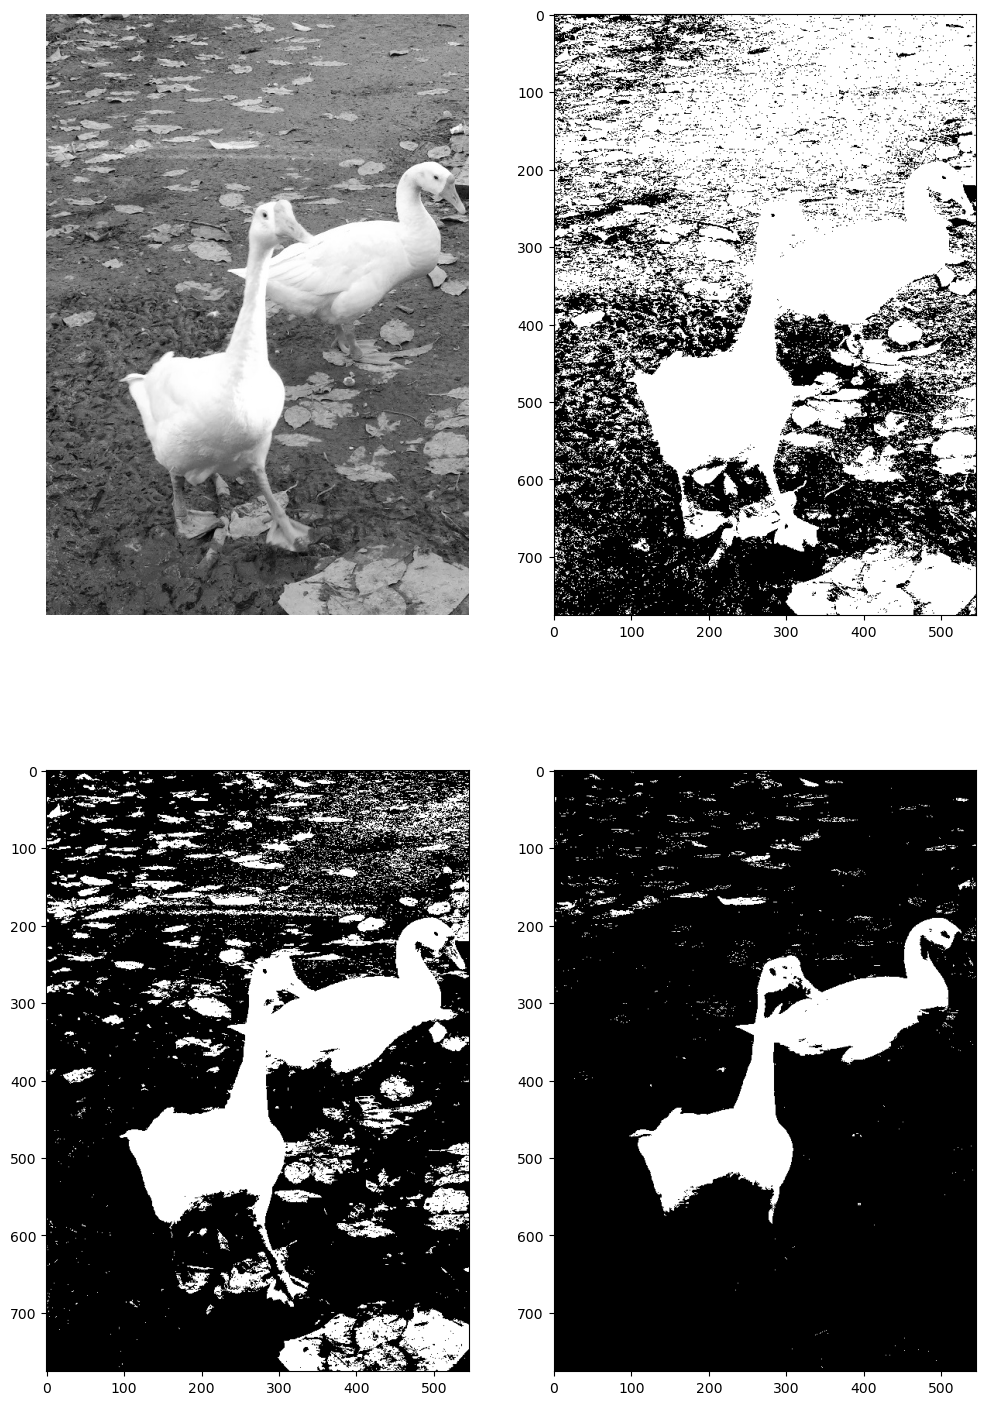

In [2]:
im = Image.open('./images/swans.jpg').convert('L') 
pylab.hist(np.array(im).ravel(), bins=256, range=(0, 256), color='g') 
pylab.xlabel('Pixel values'), pylab.ylabel('Frequency'), 
pylab.title('Histogram of pixel values')
pylab.show() 
pylab.figure(figsize=(12,18)) 
pylab.gray()
pylab.subplot(221), pylab.imshow(im), pylab.axis('off') 
th = [0, 50, 100, 150, 200]
for i in range(2, 5):
    im1 = im.point(lambda x: x > th[i])
    pylab.subplot(2,2,i), pylab.imshow(im1) 
pylab.show()


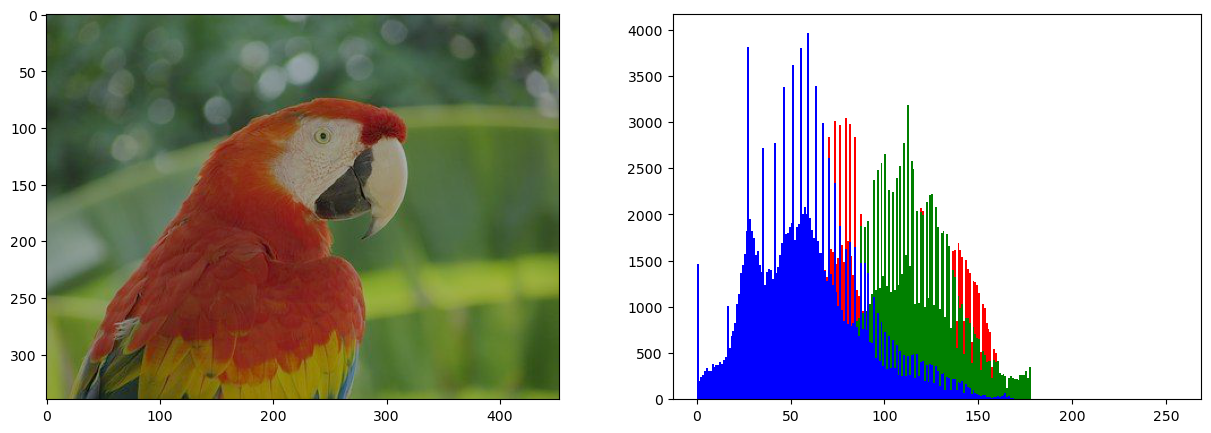

In [3]:
#Log transform

def hist(r,g,b):
    r,g,b = img_as_ubyte(r),img_as_ubyte(g),img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(),bins=256,range=(0,256),color='r')
    pylab.hist(np.array(g).ravel(),bins=256,range=(0,256),color='g')
    pylab.hist(np.array(b).ravel(),bins=256,range=(0,256),color='b')
    
    
im = Image.open('./images/parrot.jpg')

im = im.point(lambda i: 255*np.log(1+i/255) )


im_r,im_g,im_b = im.split()
pylab.figure(figsize=(15,5))
pylab.subplot(121)
pylab.imshow(im)
pylab.subplot(122)
hist(im_r,im_g,im_b)
pylab.show()

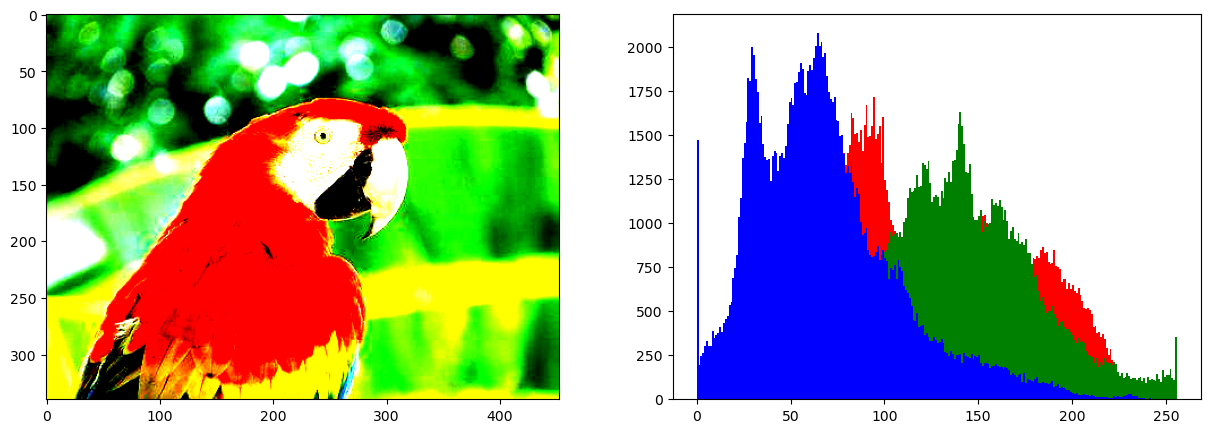

In [4]:
# Contrast Stretching

#Log transform

def hist(r,g,b):
    r,g,b = img_as_ubyte(r),img_as_ubyte(g),img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(),bins=256,range=(0,256),color='r')
    pylab.hist(np.array(g).ravel(),bins=256,range=(0,256),color='g')
    pylab.hist(np.array(b).ravel(),bins=256,range=(0,256),color='b')
    
    
im = Image.open('./images/parrot.jpg')

def contrast(c):
    return 0 if c<70 else(255 if c>150 else (c*255 - 22950)/48)

im1 = im.point(contrast)

im_r,im_g,im_b = im.split()
pylab.figure(figsize=(15,5))
pylab.subplot(121)
pylab.imshow(im1)
pylab.subplot(122)
hist(im_r,im_g,im_b)
pylab.show()

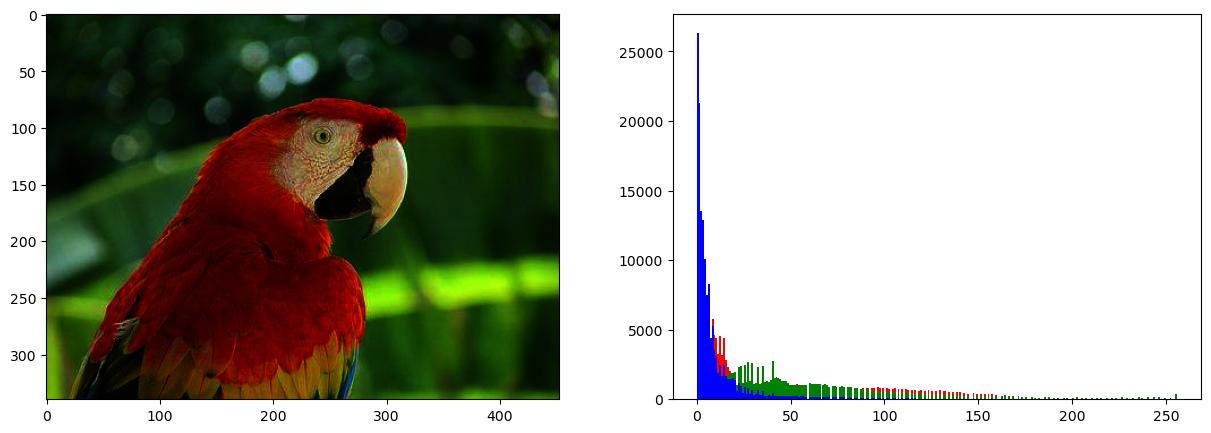

In [8]:
#Gamma transform
from skimage import img_as_float 

def hist(r,g,b):
    r,g,b = img_as_ubyte(r),img_as_ubyte(g),img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(),bins=256,range=(0,256),color='r')
    pylab.hist(np.array(g).ravel(),bins=256,range=(0,256),color='g')
    pylab.hist(np.array(b).ravel(),bins=256,range=(0,256),color='b')
    
    
im = img_as_float(imread('./images/parrot.jpg'))

gamma = 3
im1 = im ** gamma

#im_r,im_g,im_b = im.split()
pylab.figure(figsize=(15,5))
pylab.subplot(121)
pylab.imshow(im1)
pylab.subplot(122)
hist(im1[...,0],im1[...,1],im1[...,2])
pylab.show()

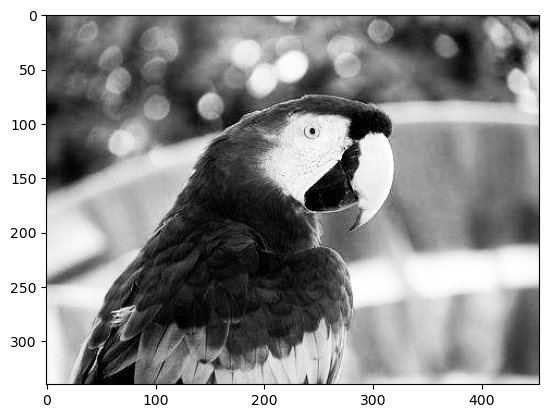

In [15]:
#Histogram Equalization
from skimage import exposure
from skimage.color import rgb2gray

def hist(r,g,b):
    r,g,b = img_as_ubyte(r),img_as_ubyte(g),img_as_ubyte(b)
    pylab.hist(np.array(r).ravel(),bins=256,range=(0,256),color='r')
    pylab.hist(np.array(g).ravel(),bins=256,range=(0,256),color='g')
    pylab.hist(np.array(b).ravel(),bins=256,range=(0,256),color='b')
    
    
im = rgb2gray(imread('./images/parrot.jpg'))

im1 = exposure.equalize_hist(im)


pylab.imshow(im1)
pylab.show()